# <font color='#eb3483'>Predicting price of Airbnb rental</font>

Airbnb is an extraordinarily successful home-sharing platform. The flexibility it provides in terms of rent-duration appeals to both renters and guests. This flexibility is coupled with a worry about how much to charge or pay. Renters and guest might need a little help on that. For this assignment we are going to predict the price of an Airbnb rental using the dataset `airbnb.csv` provided. The data consists of prices of homes or apartments and rooms in neighborhoods or districts in Lisbon, Portugal. The variable we are going to predict is `price`.

Use any ensemble technique you learned today and determine a baseline model. Begin by exploring the data, do any cleaning and preprocessing that might be necessary. Then use the best model to make predictions. Finally, discuss any insights from the model.

<hr>

**IF you want to use the airbnb data from your own town**

or a nearby one - go to ... 
http://insideairbnb.com/get-the-data.html
and use the SUMMARY LISTINGS for your chosen town. 

The columns (features) can be simplified to the same as in the example data provided in your homework folder - or feel free to do some thinking about what variables you could include or what you should drop.

In [243]:
import pandas as pd
import numpy as np

In [244]:
a = pd.read_csv("data/airbnb.csv")
a.isnull().sum()

room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction    10
accommodates             0
bedrooms                 0
price                    0
dtype: int64

In [245]:
a = a.fillna(0)
a = a.drop(columns = ["host_id", "room_id"])
a.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
dtype: int64

In [209]:
a.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [246]:
a = pd.get_dummies(a,
                     columns = ['room_type', 'neighborhood'])
a.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Ajuda,neighborhood_Alcântara,...,neighborhood_Marvila,neighborhood_Misericórdia,neighborhood_Olivais,neighborhood_Parque das Nações,neighborhood_Penha de França,neighborhood_Santa Clara,neighborhood_Santa Maria Maior,neighborhood_Santo António,neighborhood_São Domingos de Benfica,neighborhood_São Vicente
0,8,5.0,2,1.0,57.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,2,1.0,46.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63,5.0,3,1.0,69.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,225,4.5,4,1.0,58.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,132,5.0,4,1.0,67.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [248]:
from sklearn.model_selection import train_test_split
y = a.price
X = a.drop(columns = "price")
X

,reviews,overall_satisfaction,accommodates,bedrooms,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Ajuda,neighborhood_Alcântara,neighborhood_Alvalade,...,neighborhood_Marvila,neighborhood_Misericórdia,neighborhood_Olivais,neighborhood_Parque das Nações,neighborhood_Penha de França,neighborhood_Santa Clara,neighborhood_Santa Maria Maior,neighborhood_Santo António,neighborhood_São Domingos de Benfica,neighborhood_São Vicente
0,8,5.0,2,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,2,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,63,5.0,3,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,225,4.5,4,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,132,5.0,4,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,0,0.0,6,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13228,0,0.0,3,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13229,0,0.0,6,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13230,0,0.0,4,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [249]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (9924, 31)
y_train (9924,)
X_test (3308, 31)
y_test (3308,)


In [250]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [251]:
y_pred_train = model.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R^2: 0.14162092731974762
Adjusted R^2: 0.1389308998982871
MAE: 39.888094565669896
MSE: 17312.74135609073
RMSE: 131.57789083311349


In [252]:
y_pred = model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.21622613719592942
Adjusted R^2: 0.2088094736590166
MAE: 38.33266777017996
MSE: 9884.745388486288
RMSE: 99.42205685101415


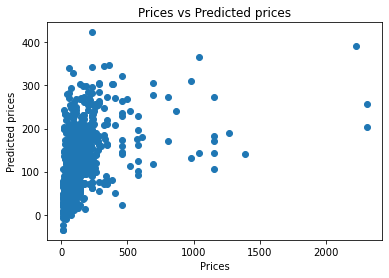

In [253]:
import matplotlib.pyplot as plt

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [254]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 20)
rfg.fit(X_train, y_train)

y_pred_train = rfg.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R^2: 0.5318738629545696
Adjusted R^2: 0.5304068279516978
MAE: 22.972521800633537
MSE: 9441.68723427438
RMSE: 97.16834481596555


In [256]:
y_pred_test = rfg.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R^2: -0.036555001753980854
Adjusted R^2: -0.04636367240549899
MAE: 38.218402801227306
MSE: 13072.75320057642
RMSE: 114.3361412702756
